<a href="https://colab.research.google.com/github/Praharshita1275/deep_learning_practice/blob/main/deep_learning_sem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 1


In [ ]:
!pip install keras --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0


In [ ]:
#Sample Code: Build a Simple Neural Network with PyTorch
import torch                          # Imports the core PyTorch library for tensor operations
import torch.nn as nn                 # Imports neural network modules (layers, loss functions)
import torch.optim as optim           # Imports optimization algorithms

# Dummy dataset
x = torch.randn(100, 3)               # Creates input data with 100 samples and 3 features each
y = torch.randn(100, 1)               # Creates target output data with 100 samples and 1 value each

# Define model
class SimpleNet(nn.Module):           # Defines a neural network class inheriting from nn.Module
    def __init__(self):
        super().__init__()             # Initializes the parent nn.Module class
        self.linear = nn.Linear(3, 1)  # Defines a linear layer with 3 inputs and 1 output

    def forward(self, x):
        return self.linear(x)          # Specifies the forward pass computation

model = SimpleNet()                   # Creates an instance of the neural network

loss_fn = nn.MSELoss()                # Defines Mean Squared Error as the loss function
optimizer = optim.Adam(
    model.parameters(),               # Passes model parameters to the optimizer
    lr=0.01                            # Sets the learning rate
)

# Training loop
for epoch in range(100):              # Runs training for 100 epochs
    y_pred = model(x)                 # Performs forward pass to get predictions
    loss = loss_fn(y_pred, y)         # Computes loss between predictions and true values

    optimizer.zero_grad()              # Clears previous gradients
    loss.backward()                   # Computes gradients using backpropagation
    optimizer.step()                  # Updates model parameters

print("Final loss:", loss.item())     # Prints the final training loss as a scalar value

Final loss: 0.7382493019104004


In [ ]:
# Sample Code: Simple Neural Network with TensorFlow

import tensorflow as tf                    # Imports the TensorFlow library for deep learning

# Dummy data
x = tf.random.normal((100, 3))             # Creates input data with 100 samples and 3 features each
y = tf.random.normal((100, 1))             # Creates target output data with 100 samples and 1 value each

# Define model
model = tf.keras.Sequential([              # Creates a Sequential neural network model
    tf.keras.layers.Dense(1,               # Adds a Dense (fully connected) layer with 1 output neuron
                          input_shape=(3,))# Specifies the input dimension as 3 features
])

model.compile(optimizer='adam',             # Configures the Adam optimizer for training
              loss='mse')                   # Uses Mean Squared Error as the loss function

# Train model
model.fit(x, y,                             # Trains the model using input and target data
          epochs=100,                       # Number of training iterations over the dataset
          verbose=0)                        # Suppresses training progress output

print("Final loss:",                       # Prints a message label
      model.evaluate(x, y))                # Evaluates the trained model on the same dataset


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.6081
Final loss: 1.6080598831176758


In [ ]:
# Sample Code: Same Network Using Keras (via tf.keras)

from tensorflow import keras              # Imports Keras API from TensorFlow
from tensorflow.keras import layers       # Imports neural network layers module

# Dummy data
x = tf.random.normal((100, 3))             # Generates input data with 100 samples and 3 features each
y = tf.random.normal((100, 1))             # Generates target output data with 100 samples and 1 value each

# Model
model = keras.Sequential([                # Creates a Sequential Keras model
    layers.Dense(1,                       # Adds a Dense (fully connected) layer with 1 output neuron
                 input_shape=(3,))        # Specifies input dimension as 3 features
])

model.compile(optimizer='adam',            # Configures Adam optimizer for training
              loss='mse')                  # Sets Mean Squared Error as the loss function

model.fit(x, y,                            # Trains the model on input and target data
          epochs=100,                      # Number of complete passes over the dataset
          verbose=0)                       # Suppresses training progress output

print("Final loss:",                       # Prints a label for the output
      model.evaluate(x, y))                # Evaluates the trained model on the same dataset


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.8043
Final loss: 1.8043233156204224


In [ ]:
# IMPLEMENT A SIMPLE PERCEPTRON (Coding a Neuron)

import numpy as np                        # Imports NumPy for numerical and vector operations

def sigmoid(x):
  # Sigmoid activation function: squashes input values between 0 and 1
  # Formula: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))             # Computes sigmoid of x

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights                # Stores the weights of the neuron
    self.bias = bias                      # Stores the bias value

  def feedforward(self, inputs):
    # Computes the weighted sum of inputs and bias
    total = np.dot(self.weights, inputs) + self.bias
    # Applies the sigmoid activation function to the total input
    return sigmoid(total)

weights = np.array([0, 1])                # Defines weights: w1 = 0, w2 = 1
bias = 4                                  # Defines bias value b = 4

n = Neuron(weights, bias)                 # Creates a neuron object with given weights and bias

x = np.array([2, 3])                      # Input vector: x1 = 2, x2 = 3
print(n.feedforward(x))                   # Outputs the neuron's activated value


0.9990889488055994


In [ ]:
import numpy as np

# Step function for binary classification
def step(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights            # Stores weights
        self.bias = bias                  # Stores bias

    def predict(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias  # Weighted sum
        return step(total)                # Binary output

# AND gate parameters
weights = np.array([1, 1])               # Both inputs must be 1
bias = -1.5                              # Threshold shift

and_gate = Perceptron(weights, bias)

# Testing AND gate
print("AND Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", and_gate.predict(np.array(x)))

AND Gate
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1


In [ ]:
# OR gate parameters
weights = np.array([1, 1])               # Any one input activates output
bias = -0.5                              # Lower threshold

or_gate = Perceptron(weights, bias)

# Testing OR gate
print("\nOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", or_gate.predict(np.array(x)))



OR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1


In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class XOR_Network:
    def __init__(self):
        # Hidden layer weights and biases
        self.w1 = np.array([[1, 1], [1, 1]])   # Weights for hidden neurons DEFINDED MANUALLY
        self.b1 = np.array([-0.5, -1.5])       # Biases for hidden neurons  DEFINDED MANUALLY

        # Output layer weights and bias
        self.w2 = np.array([1, -2])            # Weights for output neuron
        self.b2 = -0.5                         # Bias for output neuron

    def predict(self, x):
        # Hidden layer computation
        h = sigmoid(np.dot(self.w1, x) + self.b1)

        # Output layer computation
        output = sigmoid(np.dot(self.w2, h) + self.b2)

        return 1 if output >= 0.5 else 0        # Binary classification

xor_gate = XOR_Network()

# Testing XOR gate
print("\nXOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", xor_gate.predict(np.array(x)))


XOR Gate
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 0


In [ ]:
import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

class XOR_Network:
    def __init__(self):
        # Hidden neuron 1: OR gate
        self.w_or = np.array([1, 1])
        self.b_or = -0.5

        # Hidden neuron 2: AND gate
        self.w_and = np.array([1, 1])
        self.b_and = -1.5

        # Output neuron: OR - AND
        self.w_out = np.array([1, -2])
        self.b_out = -0.5

    def predict(self, x):
        h1 = step(np.dot(self.w_or, x) + self.b_or)     # OR result
        h2 = step(np.dot(self.w_and, x) + self.b_and)  # AND result

        output = step(self.w_out[0]*h1 + self.w_out[1]*h2 + self.b_out)
        return output

xor_gate = XOR_Network()

# Test XOR gate
print("XOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", xor_gate.predict(np.array(x)))

XOR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


# WEEK 2



In [ ]:
#Implement the XOR logic operation using a multi-perceptron network, and analyze how multiple perceptrons overcome the limitations of a single perceptron.
import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

class XOR_Network:
    def __init__(self):
        # Hidden neuron 1: OR gate
        self.w_or = np.array([1, 1])
        self.b_or = -0.5

        # Hidden neuron 2: AND gate
        self.w_and = np.array([1, 1])
        self.b_and = -1.5

        # Output neuron: OR - AND
        self.w_out = np.array([1, -2])
        self.b_out = -0.5

    def predict(self, x):
        h1 = step(np.dot(self.w_or, x) + self.b_or)     # OR result
        h2 = step(np.dot(self.w_and, x) + self.b_and)  # AND result

        output = step(self.w_out[0]*h1 + self.w_out[1]*h2 + self.b_out)
        return output

xor_gate = XOR_Network()

# Test XOR gate
print("XOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", xor_gate.predict(np.array(x)))

XOR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


In [ ]:
#Implement the Perceptron Learning Algorithm and study the effect of weight updates on convergence for linearly separable datasets.
import numpy as np

# Step activation function for perceptron
def step_function(x):
  return 1 if x >= 0 else 0

class Perceptron:
  def __init__(self, num_inputs, learning_rate=0.1, epochs=10):
    self.weights = np.zeros(num_inputs + 1)  # +1 for bias
    self.learning_rate = learning_rate
    self.epochs = epochs

  def predict(self, inputs):
    # Add bias term to inputs by prepending 1
    summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
    return step_function(summation)

  def train(self, training_inputs, labels):
    print("\nStarting Perceptron Training...")
    for epoch in range(self.epochs):
      print(f"\nEpoch {epoch + 1}/{self.epochs}")
      total_error = 0
      for inputs, label in zip(training_inputs, labels):
        prediction = self.predict(inputs)
        error = label - prediction
        total_error += abs(error)

        # Update weights and bias
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error # Update bias
        # print(f"  Inputs: {inputs}, Label: {label}, Prediction: {prediction}, Error: {error}, New Weights: {self.weights}")

      print(f"  Epoch {epoch + 1} finished with total error: {total_error}")
      if total_error == 0:
        print("  Perceptron converged!")
        break
    print("Training complete.")

training_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Labels (AND gate output)
labels = np.array([0, 0, 0, 1])
perceptron = Perceptron(num_inputs=2, learning_rate=0.1, epochs=10)
perceptron.train(training_inputs, labels)

print("\nTesting trained Perceptron:")
for inputs, label in zip(training_inputs, labels):
    prediction = perceptron.predict(inputs)
    print(f"  Input: {inputs}, Expected: {label}, Predicted: {prediction}")


Starting Perceptron Training...

Epoch 1/10
  Epoch 1 finished with total error: 2

Epoch 2/10
  Epoch 2 finished with total error: 3

Epoch 3/10
  Epoch 3 finished with total error: 3

Epoch 4/10
  Epoch 4 finished with total error: 0
  Perceptron converged!
Training complete.

Testing trained Perceptron:
  Input: [0 0], Expected: 0, Predicted: 0
  Input: [0 1], Expected: 0, Predicted: 0
  Input: [1 0], Expected: 0, Predicted: 0
  Input: [1 1], Expected: 1, Predicted: 1


In [ ]:
#Demonstrate the representational power of a perceptron by evaluating its capability and limitations in solving classification problems.
import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

class XOR_Network:
    def __init__(self):
        # Hidden neuron 1: OR gate
        self.w_and = np.array([1, 1])
        self.b_and = -0.5

        # Hidden neuron 2: AND gate
        self.w_or = np.array([1, -2])
        self.b_or = -0.5

        # Output neuron: OR - AND
        self.w_out = np.array([1, 1])
        self.b_out = -0.5

    def predict(self, x):
        h1 = step(np.dot(self.w_and, x) + self.b_or)     # AND result
        h2 = step(np.dot(self.w_or, x) + self.b_and)  # OR result

        output = step(self.w_out[0]*h1 + self.w_out[1]*h2 + self.b_out)
        return output

xor_gate = XOR_Network()

# Test XOR gate
print("XOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", xor_gate.predict(np.array(x)))


XOR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1


In [ ]:
import numpy as np

def step(x):
  return 1 if x >= 0 else 0

class XOR_Network:
  def __init__(self):
    # Hidden neuron 1: OR gate
    self.w_or = np.array([1, 1])
    self.b_or = -0.5

    # Hidden neuron 2: AND gate
    self.w_and = np.array([1, 1])
    self.b_and = -1.5

    # Output neuron: OR - AND
    self.w_out = np.array([1, -2])
    self.b_out = -0.5

  def predict(self, x):
    h1 = step(np.dot(self.w_or, x) + self.b_or)     # OR result
    h2 = step(np.dot(self.w_and, x) + self.b_and)  # AND result

    output = step(self.w_out[0]*h1 + self.w_out[1]*h2 + self.b_out)
    return output

xor_gate = XOR_Network()

# Test XOR gate
print("XOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", xor_gate.predict(np.array(x)))

XOR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


In [ ]:
#Design and implement a Multi-Layer Perceptron (MLP) architecture capable of realizing all basic Boolean functions.
import numpy as np

def step(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def predict(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return step(total)

print("\nAND Gate")
and_perceptron = Perceptron(weights=[1, 1], bias=-1.5)
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"AND{x} -> {and_perceptron.predict(np.array(x))}")

# --- Implement OR Gate ---
print("\nOR Gate")
or_perceptron = Perceptron(weights=[1, 1], bias=-0.5)
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"OR{x} -> {or_perceptron.predict(np.array(x))}")

# --- Implement NOT Gate ---
print("\nNOT Gate")
not_perceptron = Perceptron(weights=[-1], bias=0.5)
for x in [0, 1]:
    print(f"NOT({x}) -> {not_perceptron.predict(np.array([x]))}")

class XOR_Network:
    def __init__(self):
        # Hidden neuron 1: OR gate like parameters
        self.w_or_h = np.array([1, 1])
        self.b_or_h = -0.5

        # Hidden neuron 2: AND gate like parameters
        self.w_and_h = np.array([1, 1])
        self.b_and_h = -1.5

        self.w_out = np.array([1, -2]) # w_out[0] for OR_h, w_out[1] for AND_h
        self.b_out = -0.5

    def predict(self, x):
        # Hidden layer computation
        h1_output = step(np.dot(self.w_or_h, x) + self.b_or_h)   # Output of first hidden neuron (OR-like)
        h2_output = step(np.dot(self.w_and_h, x) + self.b_and_h) # Output of second hidden neuron (AND-like)

        # Output layer computation
        hidden_outputs = np.array([h1_output, h2_output])
        final_output = step(np.dot(self.w_out, hidden_outputs) + self.b_out)
        return final_output

print("\nXOR Gate (Multi-Layer Perceptron)")
xor_mlp = XOR_Network()
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"XOR{x} -> {xor_mlp.predict(np.array(x))}")



AND Gate
AND(0, 0) -> 0
AND(0, 1) -> 0
AND(1, 0) -> 0
AND(1, 1) -> 1

OR Gate
OR(0, 0) -> 0
OR(0, 1) -> 1
OR(1, 0) -> 1
OR(1, 1) -> 1

NOT Gate
NOT(0) -> 1
NOT(1) -> 0

XOR Gate (Multi-Layer Perceptron)
XOR(0, 0) -> 0
XOR(0, 1) -> 1
XOR(1, 0) -> 1
XOR(1, 1) -> 0


In [5]:
# 2
# Examine the feasibility of implementing the XOR operation (Non linear data) using a single perceptron.
# If not possible, clearly explain the reason based on the concept of linear separability.

def perceptron(x1, x2, w1, w2, b):
    act = w1*x1 + w2*x2 + b
    return 1 if act >= 0 else 0

import numpy as np

# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])  # XOR outputs

w1, w2, b = 1, 1, -1
print("x1 x2 predicted expected")
for i in range(len(X)):
    x1, x2 = X[i]
    print(x1, x2,
          perceptron(x1, x2, w1, w2, b),
          y[i])

  # The XOR operation cannot be implemented using a single perceptron because its input–output patterns are not linearly separable.
  # A single perceptron can only form a linear decision boundary, whereas XOR requires a non-linear boundary. Hence, XOR requires a multi-layer perceptron.

x1 x2 predicted expected
0 0 0 0
0 1 1 1
1 0 1 1
1 1 1 0


In [4]:
# Examine the feasibility of implementing the XNOR operation (Non linear data) using a single perceptron.

def perceptron(x1, x2, w1, w2, b):
    act = w1*x1 + w2*x2 + b
    return 1 if act >= 0 else 0

# XNOR dataset
X = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]
y_xnor = [1, 0, 0, 1]   #XNOR outputs

w1, w2, b = 1, 1, -1
print("x1 x2 predicted expected")
for i in range(len(X)):
    x1, x2 = X[i]
    print(x1, x2,
          perceptron(x1, x2, w1, w2, b),
          y_xnor[i])

x1 x2 predicted expected
0 0 0 1
0 1 1 0
1 0 1 0
1 1 1 1


In [3]:
# 3
# Implement the XOR logic operation using a multi-perceptron network, and analyze how multiple perceptrons overcome the limitations of a single perceptron.

def AND(x1, x2):
  w1=1
  w2=1
  bias=-1.5
  act=w1*x1+w2*x2+bias
  if act>=0:
    return 1
  else:
    return 0

def OR(x1, x2):
  w1=1
  w2=1
  bias=-0.5
  act=w1*x1+w2*x2+bias
  if act>=0:
    return 1
  else:
    return 0

def NAND(x1, x2):
  w1=-1
  w2=-1
  bias=1.5
  act=w1*x1+w2*x2+bias
  if act>=0:
    return 1
  else:
    return 0

def XOR(x1, x2):
  flo=NAND(x1, x2)
  slo=OR(x1, x2)
  out=AND(flo, slo)
  return out

inputs = [(0,0), (0,1), (1,0), (1,1)]
print("x1 x2 output")
for x1, x2 in inputs:
    print(x1, x2, XOR(x1, x2))

x1 x2 output
0 0 0
0 1 1
1 0 1
1 1 0


In [2]:
# Implement the XNOR logic operation using a multi-perceptron network, and analyze how multiple perceptrons overcome the limitations of a single perceptron.

def AND(x1, x2):
    w1 = 1
    w2 = 1
    bias = -1.5
    act = w1*x1 + w2*x2 + bias
    return 1 if act >= 0 else 0

def OR(x1, x2):
    w1 = 1
    w2 = 1
    bias = -0.5
    act = w1*x1 + w2*x2 + bias
    return 1 if act >= 0 else 0

def NAND(x1, x2):
    w1 = -1
    w2 = -1
    bias = 1.5
    act = w1*x1 + w2*x2 + bias
    return 1 if act >= 0 else 0

def XOR(x1, x2):
    flo = NAND(x1, x2)
    slo = OR(x1, x2)
    return AND(flo, slo)

def NOT(x):
    w = -1
    bias = 0.5
    act = w*x + bias
    return 1 if act >= 0 else 0

def XNOR(x1, x2):
    return NOT(XOR(x1, x2))

inputs = [(0,0), (0,1), (1,0), (1,1)]
print("x1 x2 output")
for x1, x2 in inputs:
    print(x1, x2, XNOR(x1, x2))

x1 x2 output
0 0 1
0 1 0
1 0 0
1 1 1


In [1]:
# 4
# Demonstrate that the thresholding logic used by perceptron is very harsh.

def perceptron(act):
    return 1 if act >= 0 else 0

activations = [-0.01, -0.001, 0, 0.001, 0.01]
print("Activation Output")
for a in activations:
    print(a, "        ", perceptron(a))

Activation Output
-0.01          0
-0.001          0
0          1
0.001          1
0.01          1


In [7]:
# 5
# Implement the Perceptron Learning Algorithm and study the effect of weight updates on convergence for a binary decision problem such as
# determining whether a user would like to watch a movie.

# Perceptron Learning Algorithm for Movie Preference Classification (creating binary classifier)
import numpy as np
import pandas as pd

# -----------------------------
# 1. Create Dataset
# -----------------------------
data = {
    "Matt_Damon": [1, 1, 0, 0, 1, 0],
    "Thriller":   [1, 0, 1, 0, 1, 0],
    "Nolan":      [0, 1, 1, 0, 1, 0],
    "IMDB":       [0.9, 0.8, 0.85, 0.4, 0.95, 0.3],
    "Like":       [1, 1, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
X = df[["Matt_Damon", "Thriller", "Nolan", "IMDB"]].values
y = df["Like"].values.reshape(-1, 1)

# -----------------------------
# 2. Activation Functions
# -----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# -----------------------------
# 3. Evaluation Metrics
# -----------------------------
def metrics(y_true, y_pred):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    return accuracy, precision, recall

# -----------------------------
# 4. (i) MP Perceptron (Rule-based)
# -----------------------------
def mp_perceptron(x):
    return 1 if (x[0] == 1 or x[3] > 0.7) else 0

mp_preds = np.array([mp_perceptron(x) for x in X]).reshape(-1, 1)
mp_acc, mp_prec, mp_rec = metrics(y, mp_preds)

# -----------------------------
# 5. (ii & iii) Perceptron using Gradient Descent
#     (Single-layer neural network)
# -----------------------------
np.random.seed(42)
W = np.random.rand(X.shape[1], 1)
b = np.random.rand(1)

learning_rate = 0.1
epochs = 5000

# Training loop (Gradient Descent)
for epoch in range(epochs):

    # ---- Forward propagation ----
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)

    # ---- Loss (MSE) ----
    error = y - y_pred
    loss = np.mean(error ** 2)

    # ---- Backpropagation ----
    d_output = error * sigmoid_derivative(y_pred)

    # ---- Weight & bias updates ----
    W += learning_rate * np.dot(X.T, d_output)
    b += learning_rate * np.sum(d_output)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# -----------------------------
# 6. Predictions & Metrics
# -----------------------------
final_output = sigmoid(np.dot(X, W) + b)
final_predictions = (final_output >= 0.5).astype(int)

acc, prec, rec = metrics(y, final_predictions)

# -----------------------------
# 7. Print Metrics
# -----------------------------
print("\n--- Model Evaluation Metrics ---\n")

print("MP Perceptron (No Learning)")
print(f"Accuracy : {mp_acc:.2f}")
print(f"Precision: {mp_prec:.2f}")
print(f"Recall   : {mp_rec:.2f}\n")

print("Gradient Descent Perceptron (Weights + Bias)")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")

# -----------------------------
# 8. Test with New Movie
# -----------------------------
test_movie = np.array([[1, 1, 0, 0.88]])
test_output = sigmoid(np.dot(test_movie, W) + b)
test_prediction = 1 if test_output >= 0.5 else 0

print("\n--- Test Movie Prediction ---")
print("MP Perceptron:", "Like" if mp_perceptron(test_movie[0]) else "Dislike")
print("Gradient Descent Perceptron:", "Like" if test_prediction else "Dislike")

Epoch 0, Loss: 0.1240
Epoch 1000, Loss: 0.0041
Epoch 2000, Loss: 0.0019
Epoch 3000, Loss: 0.0013
Epoch 4000, Loss: 0.0009

--- Model Evaluation Metrics ---

MP Perceptron (No Learning)
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00

Gradient Descent Perceptron (Weights + Bias)
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00

--- Test Movie Prediction ---
MP Perceptron: Like
Gradient Descent Perceptron: Like


In [4]:
# 6
# Demonstrate the Representation Power of a Network of Perceptrons
# a) How many Boolean functions can be designed using two binary inputs?
# b) For each Boolean function, determine whether it is linearly separable.
# c) mplement a single perceptron model and test whether it can correctly learn each Boolean function. (Mention how many it can't learn and why)
# d) Extend the program to estimate or analyze how the number of non-linearly separable Boolean functions increases as the number of inputs n grows.

import numpy as np
import itertools
import math

# -----------------------------
# Binary input combinations (2 inputs)
# -----------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Step activation
def step(x):
    return 1 if x >= 0 else 0

# -----------------------------
# Single Perceptron Training
# -----------------------------
def train_perceptron(X, y, lr=0.1, epochs=50):
    w = np.zeros(X.shape[1])
    b = 0

    for _ in range(epochs):
        errors = 0
        for i in range(len(X)):
            y_pred = step(np.dot(X[i], w) + b)
            error = y[i] - y_pred
            if error != 0:
                w += lr * error * X[i]
                b += lr * error
                errors += 1
        if errors == 0:
            return True   # Converged (linearly separable)
    return False          # Not converged (not linearly separable)

# -----------------------------
# (a) Total Boolean Functions
# -----------------------------
n = 2
total_functions = 2 ** (2 ** n)
print("Total Boolean functions (n=2):", total_functions)

# -----------------------------
# (b) Generate all Boolean functions
# -----------------------------
boolean_functions = list(itertools.product([0, 1], repeat=4))

linearly_separable = 0
not_separable = 0

print("\nTesting Boolean Functions:\n")

# -----------------------------
# (c) Test each Boolean function
# -----------------------------
for idx, func in enumerate(boolean_functions):
    y = np.array(func)
    learned = train_perceptron(X, y)

    if learned:
        linearly_separable += 1
        result = "Linearly Separable"
    else:
        not_separable += 1
        result = "Not Linearly Separable"

    print(f"Function {idx+1}: {func} --> {result}")

print("\nSummary for n = 2")
print("Linearly separable functions:", linearly_separable)
print("Not linearly separable functions:", not_separable)

# -----------------------------
# (d) Growth of Non-linearly Separable Functions
# -----------------------------
print("\nGrowth Analysis:")
for n in range(1, 6):
    total = 2 ** (2 ** n)
    print(f"Inputs = {n} | Total Boolean Functions = {total}")


Total Boolean functions (n=2): 16

Testing Boolean Functions:

Function 1: (0, 0, 0, 0) --> Linearly Separable
Function 2: (0, 0, 0, 1) --> Linearly Separable
Function 3: (0, 0, 1, 0) --> Linearly Separable
Function 4: (0, 0, 1, 1) --> Linearly Separable
Function 5: (0, 1, 0, 0) --> Linearly Separable
Function 6: (0, 1, 0, 1) --> Linearly Separable
Function 7: (0, 1, 1, 0) --> Not Linearly Separable
Function 8: (0, 1, 1, 1) --> Linearly Separable
Function 9: (1, 0, 0, 0) --> Linearly Separable
Function 10: (1, 0, 0, 1) --> Not Linearly Separable
Function 11: (1, 0, 1, 0) --> Linearly Separable
Function 12: (1, 0, 1, 1) --> Linearly Separable
Function 13: (1, 1, 0, 0) --> Linearly Separable
Function 14: (1, 1, 0, 1) --> Linearly Separable
Function 15: (1, 1, 1, 0) --> Linearly Separable
Function 16: (1, 1, 1, 1) --> Linearly Separable

Summary for n = 2
Linearly separable functions: 14
Not linearly separable functions: 2

Growth Analysis:
Inputs = 1 | Total Boolean Functions = 4
Inputs 

In [3]:
# 7
# Design and implement a Multi-Layer Perceptron (MLP) architecture capable of realizing all basic Boolean functions (i.e with linearly separable or not data)

import numpy as np

# -----------------------------
# Boolean input combinations
# -----------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Boolean functions
boolean_functions = {
    "AND":  np.array([[0], [0], [0], [1]]),
    "OR":   np.array([[0], [1], [1], [1]]),
    "NAND": np.array([[1], [1], [1], [0]]),
    "NOR":  np.array([[1], [0], [0], [0]]),
    "XOR":  np.array([[0], [1], [1], [0]]),
    "XNOR": np.array([[1], [0], [0], [1]])
}

# -----------------------------
# Activation functions
# -----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# -----------------------------
# MLP Training Function
# -----------------------------
def train_mlp(X, y, hidden_neurons=2, lr=0.1, epochs=10000):
    np.random.seed(42)

    # Initialize weights & biases
    W1 = np.random.rand(2, hidden_neurons)
    b1 = np.random.rand(1, hidden_neurons)
    W2 = np.random.rand(hidden_neurons, 1)
    b2 = np.random.rand(1, 1)

    # Training loop
    for epoch in range(epochs):

        # ---- Forward pass ----
        hidden_input = np.dot(X, W1) + b1
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, W2) + b2
        y_pred = sigmoid(final_input)

        # ---- Backpropagation ----
        error = y - y_pred
        d_output = error * sigmoid_derivative(y_pred)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        # ---- Update weights & biases ----
        W2 += hidden_output.T.dot(d_output) * lr
        b2 += np.sum(d_output, axis=0, keepdims=True) * lr

        W1 += X.T.dot(d_hidden) * lr
        b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    return W1, b1, W2, b2

# -----------------------------
# Test the MLP
# -----------------------------
print("\nMLP Results for Boolean Functions:\n")

for name, y in boolean_functions.items():
    W1, b1, W2, b2 = train_mlp(X, y)

    hidden = sigmoid(np.dot(X, W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)
    predictions = (output >= 0.5).astype(int)

    print(f"{name}:")
    for i in range(len(X)):
        print(f"  {X[i]} -> {predictions[i][0]}")
    print()


MLP Results for Boolean Functions:

AND:
  [0 0] -> 0
  [0 1] -> 0
  [1 0] -> 0
  [1 1] -> 1

OR:
  [0 0] -> 0
  [0 1] -> 1
  [1 0] -> 1
  [1 1] -> 1

NAND:
  [0 0] -> 1
  [0 1] -> 1
  [1 0] -> 1
  [1 1] -> 0

NOR:
  [0 0] -> 1
  [0 1] -> 0
  [1 0] -> 0
  [1 1] -> 0

XOR:
  [0 0] -> 0
  [0 1] -> 1
  [1 0] -> 1
  [1 1] -> 0

XNOR:
  [0 0] -> 1
  [0 1] -> 0
  [1 0] -> 0
  [1 1] -> 1



In [1]:
# 8
# How many Boolean functions can be designed using three binary inputs?
# Find respective weights w1 to w8) and demonstrate for all the possible boolean functions for three inputs.

import numpy as np
import itertools

# -----------------------------
# 3-input combinations
# -----------------------------
X = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Step activation
def step(x):
    return 1 if x >= 0 else 0

# Single perceptron training
def train_perceptron(X, y, lr=0.1, epochs=50):
    w = np.zeros(X.shape[1])
    b = 0

    for _ in range(epochs):
        errors = 0
        for i in range(len(X)):
            y_pred = step(np.dot(X[i], w) + b)
            error = y[i] - y_pred
            if error != 0:
                w += lr * error * X[i]
                b += lr * error
                errors += 1
        if errors == 0:
            return True   # Linearly separable
    return False          # Not linearly separable

# -----------------------------
# Generate all Boolean functions
# -----------------------------
boolean_functions = list(itertools.product([0, 1], repeat=8))

separable = 0
non_separable = 0

for func in boolean_functions:
    y = np.array(func)
    if train_perceptron(X, y):
        separable += 1
    else:
        non_separable += 1

# -----------------------------
# Results
# -----------------------------
print("Total Boolean functions (3 inputs):", len(boolean_functions))
print("Linearly separable functions:", separable)
print("Non-linearly separable functions:", non_separable)


Total Boolean functions (3 inputs): 256
Linearly separable functions: 104
Non-linearly separable functions: 152


# WEEK 3


Learning Rate: 0.0001, Loss: 0.6840
Learning Rate: 0.001, Loss: 0.6961
Learning Rate: 0.01, Loss: 0.6825
Learning Rate: 0.05, Loss: 0.5628
Learning Rate: 0.1, Loss: 0.4153
Learning Rate: 0.5, Loss: 0.1141


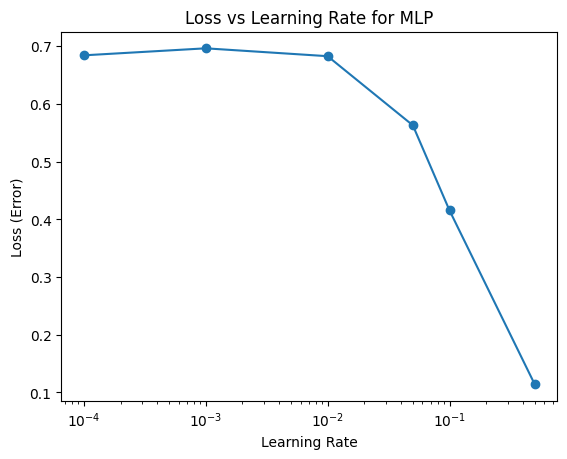

In [6]:
#9) Implement an MLP by varying bias, weights, and learning rate, and record observations for different learning rate values.
# Plot a graph showing the relationship between loss (error) and learning rate.

# MLP: Effect of Learning Rate on Loss

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Generate non-linear dataset
# -----------------------------
np.random.seed(42)
X = np.random.randn(200, 2)
y = ((X[:, 0]**2 + X[:, 1]**2) > 1).astype(int).reshape(-1, 1)

# -----------------------------
# Initialize weights & bias
# -----------------------------
def init_params():
    W1 = np.random.randn(2, 8) * 0.1
    b1 = np.zeros((1, 8))
    W2 = np.random.randn(8, 1) * 0.1
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

# -----------------------------
# Activation functions
# -----------------------------
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# -----------------------------
# Loss function
# -----------------------------
def binary_cross_entropy(y, y_hat):
    return -np.mean(
        y * np.log(y_hat + 1e-8) +
        (1 - y) * np.log(1 - y_hat + 1e-8)
    )

# -----------------------------
# Train MLP
# -----------------------------
def train_mlp(learning_rate, epochs=500):
    W1, b1, W2, b2 = init_params()

    for _ in range(epochs):
        # Forward propagation
        z1 = X @ W1 + b1
        a1 = relu(z1)
        z2 = a1 @ W2 + b2
        y_hat = sigmoid(z2)

        # Backpropagation
        dz2 = y_hat - y
        dW2 = a1.T @ dz2 / len(X)
        db2 = np.mean(dz2, axis=0, keepdims=True)

        da1 = dz2 @ W2.T
        dz1 = da1 * relu_derivative(z1)
        dW1 = X.T @ dz1 / len(X)
        db1 = np.mean(dz1, axis=0, keepdims=True)

        # Update weights and bias
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    return binary_cross_entropy(y, y_hat)

# -----------------------------
# Test different learning rates
# -----------------------------
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5]
losses = []

for lr in learning_rates:
    loss = train_mlp(lr)
    losses.append(loss)
    print(f"Learning Rate: {lr}, Loss: {loss:.4f}")

# -----------------------------
# Plot Loss vs Learning Rate
# -----------------------------
plt.figure()
plt.plot(learning_rates, losses, marker='o')
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss (Error)")
plt.title("Loss vs Learning Rate for MLP")
plt.show()


Epoch 0, Loss: 0.6914
Epoch 200, Loss: 0.6423
Epoch 400, Loss: 0.5820
Epoch 600, Loss: 0.5107
Epoch 800, Loss: 0.4328


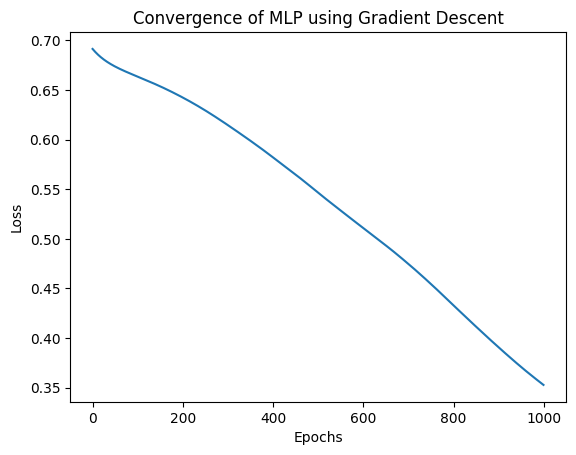

In [7]:
#10) Implement an MLP using the Gradient Descent algorithm, and analyze the convergence behavior and performance of the network.

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Generate non-linear dataset
# -----------------------------
np.random.seed(0)
X = np.random.randn(300, 2)
y = ((X[:, 0]**2 + X[:, 1]**2) > 1).astype(int).reshape(-1, 1)

# -----------------------------
# Initialize parameters
# -----------------------------
W1 = np.random.randn(2, 8) * 0.1
b1 = np.zeros((1, 8))
W2 = np.random.randn(8, 1) * 0.1
b2 = np.zeros((1, 1))

learning_rate = 0.05
epochs = 1000
losses = []

# -----------------------------
# Activation functions
# -----------------------------
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# -----------------------------
# Loss function
# -----------------------------
def binary_cross_entropy(y, y_hat):
    return -np.mean(
        y * np.log(y_hat + 1e-8) +
        (1 - y) * np.log(1 - y_hat + 1e-8)
    )

# -----------------------------
# Training using Gradient Descent
# -----------------------------
for epoch in range(epochs):

    # Forward propagation
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # Compute loss
    loss = binary_cross_entropy(y, y_hat)
    losses.append(loss)

    # Backpropagation
    dz2 = y_hat - y
    dW2 = a1.T @ dz2 / len(X)
    db2 = np.mean(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = X.T @ dz1 / len(X)
    db1 = np.mean(dz1, axis=0, keepdims=True)

    # Gradient Descent update
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# -----------------------------
# Plot convergence
# -----------------------------
plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Convergence of MLP using Gradient Descent")
plt.show()


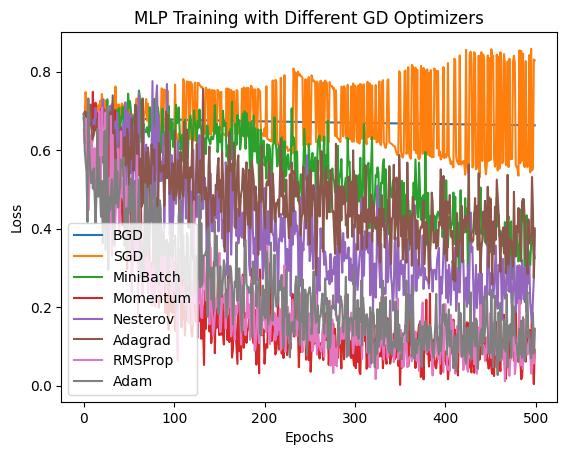

In [8]:
#Implement the MLP using the Types of GD (BGD,SGD,Mini BatchGD, SGD with Momemtum, SGD with Nesterov,Adagrad, RMSProp,Adam)

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Dataset (non-linear)
# -----------------------------
np.random.seed(42)
X = np.random.randn(300, 2)
y = ((X[:, 0]**2 + X[:, 1]**2) > 1).astype(int).reshape(-1, 1)

# -----------------------------
# Activation & Loss
# -----------------------------
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y, y_hat):
    return -np.mean(y*np.log(y_hat+1e-8) + (1-y)*np.log(1-y_hat+1e-8))

# -----------------------------
# Initialize parameters
# -----------------------------
def init_params():
    W1 = np.random.randn(2, 8) * 0.1
    b1 = np.zeros((1, 8))
    W2 = np.random.randn(8, 1) * 0.1
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

# -----------------------------
# Forward & Backward
# -----------------------------
def forward_backward(Xb, yb, W1, b1, W2, b2):
    z1 = Xb @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    dz2 = y_hat - yb
    dW2 = a1.T @ dz2 / len(Xb)
    db2 = np.mean(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = Xb.T @ dz1 / len(Xb)
    db1 = np.mean(dz1, axis=0, keepdims=True)

    loss = binary_cross_entropy(yb, y_hat)
    return dW1, db1, dW2, db2, loss

# -----------------------------
# Training function
# -----------------------------
def train(optimizer="BGD", lr=0.01, epochs=500, batch_size=32):
    W1, b1, W2, b2 = init_params()
    losses = []

    # optimizer variables
    vW1 = vb1 = vW2 = vb2 = 0
    mW1 = mb1 = mW2 = mb2 = 0
    GW1 = Gb1 = GW2 = Gb2 = 0
    beta, beta1, beta2, eps = 0.9, 0.9, 0.999, 1e-8

    for epoch in range(epochs):

        if optimizer == "BGD":
            batches = [(X, y)]
        elif optimizer == "SGD":
            idx = np.random.randint(len(X))
            batches = [(X[idx:idx+1], y[idx:idx+1])]
        else:
            idxs = np.random.permutation(len(X))
            batches = [(X[idxs[i:i+batch_size]],
                        y[idxs[i:i+batch_size]])
                       for i in range(0, len(X), batch_size)]

        for Xb, yb in batches:
            dW1, db1, dW2, db2, loss = forward_backward(Xb, yb, W1, b1, W2, b2)

            if optimizer in ["BGD", "SGD", "MiniBatch"]:
                W1 -= lr * dW1
                b1 -= lr * db1
                W2 -= lr * dW2
                b2 -= lr * db2

            elif optimizer == "Momentum":
                vW1 = beta*vW1 + lr*dW1
                vb1 = beta*vb1 + lr*db1
                vW2 = beta*vW2 + lr*dW2
                vb2 = beta*vb2 + lr*db2
                W1 -= vW1; b1 -= vb1; W2 -= vW2; b2 -= vb2

            elif optimizer == "Nesterov":
                vW1_prev = vW1
                vW1 = beta*vW1 + lr*dW1
                W1 -= beta*vW1_prev + vW1
                b1 -= lr*db1
                W2 -= lr*dW2
                b2 -= lr*db2

            elif optimizer == "Adagrad":
                GW1 += dW1**2; Gb1 += db1**2
                GW2 += dW2**2; Gb2 += db2**2
                W1 -= lr*dW1/(np.sqrt(GW1)+eps)
                b1 -= lr*db1/(np.sqrt(Gb1)+eps)
                W2 -= lr*dW2/(np.sqrt(GW2)+eps)
                b2 -= lr*db2/(np.sqrt(Gb2)+eps)

            elif optimizer == "RMSProp":
                GW1 = beta*GW1 + (1-beta)*dW1**2
                GW2 = beta*GW2 + (1-beta)*dW2**2
                W1 -= lr*dW1/(np.sqrt(GW1)+eps)
                W2 -= lr*dW2/(np.sqrt(GW2)+eps)
                b1 -= lr*db1; b2 -= lr*db2

            elif optimizer == "Adam":
                mW1 = beta1*mW1 + (1-beta1)*dW1
                mW2 = beta1*mW2 + (1-beta1)*dW2
                GW1 = beta2*GW1 + (1-beta2)*(dW1**2)
                GW2 = beta2*GW2 + (1-beta2)*(dW2**2)

                mW1_hat = mW1/(1-beta1**(epoch+1))
                mW2_hat = mW2/(1-beta1**(epoch+1))
                GW1_hat = GW1/(1-beta2**(epoch+1))
                GW2_hat = GW2/(1-beta2**(epoch+1))

                W1 -= lr*mW1_hat/(np.sqrt(GW1_hat)+eps)
                W2 -= lr*mW2_hat/(np.sqrt(GW2_hat)+eps)
                b1 -= lr*db1; b2 -= lr*db2

        losses.append(loss)

    return losses

# -----------------------------
# Run all optimizers
# -----------------------------
optimizers = ["BGD", "SGD", "MiniBatch", "Momentum", "Nesterov",
              "Adagrad", "RMSProp", "Adam"]

plt.figure()
for opt in optimizers:
    loss = train(optimizer=opt, lr=0.01)
    plt.plot(loss, label=opt)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Training with Different GD Optimizers")
plt.legend()
plt.show()
